In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import json
from stylelib import *

# Prepare global variables/utilities

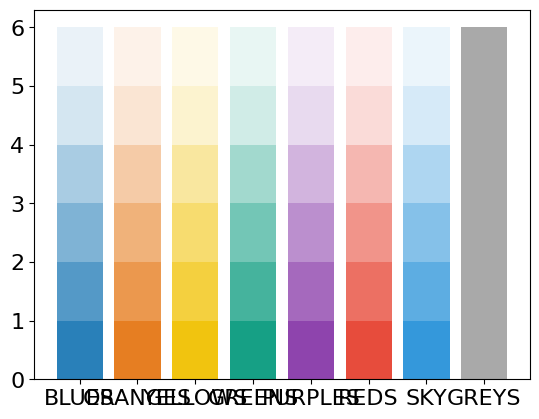

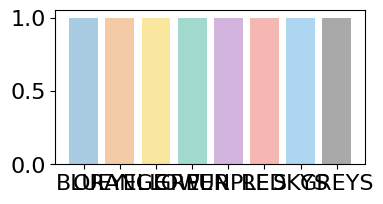

<Figure size 400x200 with 0 Axes>

In [24]:
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(2)

In [25]:
plt.rcParams.update({'font.size': 16})
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

In [26]:
def sci_notation(number, sig_fig=2):
    ret_string = "{0:.{1:d}e}".format(number, sig_fig)
    a, b = ret_string.split("e")
    # remove leading "+" and strip leading zeros
    b = int(b)
    return "10^" + str(b)
print(sci_notation(0.01))

10^-2


In [27]:
df = pd.read_csv("../../benchmark/feature/outputs/stats.csv", sep=',')
df_cwi = df[(df['dataset'] == 'cwi') ]
df_noc = df[(df['dataset'] != 'cwi')]
dtype='float64'

cwi_ratio = 36 / (32 + 36)
noc_ratio = 1 - cwi_ratio

dtype_list=['int64','float64','object']
total_width, n = 0.8,len(dtype_list)
per_width = total_width / n
color_list=['orange','gray','green']
# color_names = ["ORANGE", "YELLOW", "PURPLE"]
color_names = bar_colors.keys()
# color_patches = [bar_colors[c] for c in color_names]
color_patches = HZ_BLUES
pattern = [''] * 10
# pattern = ALL_PATTERNS

In [28]:
# def plot_card(ax=None):
#     if ax is None:
#         fig, ax = plt.subplots(figsize=single_fig_size)
#     car_cut = [1e-7,1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1]
#     for idx,dtype in enumerate(dtype_list):
#         tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
#         tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]

#         car_cwi_hist=pd.cut(tmp_df_cwi['cardinality'], car_cut).value_counts(normalize=True).sort_index() * cwi_ratio
#         car_noc_hist=pd.cut(tmp_df_noc['cardinality'], car_cut).value_counts(normalize=True).sort_index() * noc_ratio
#         car_hist=car_cwi_hist.add(car_noc_hist, fill_value=0)
#         x = np.arange(len(car_cut)-1)
#         x = x - (total_width - per_width) / 2
#         ax.bar(x+idx*per_width, car_hist.values, width=per_width, label=dtype, 
#         color=color_patches[idx], hatch=pattern[idx], edgecolor='black')
#     ax.set_title('Cardinality Ratio Distribution')
#     ax.set_xlabel('Cardinality Ratio')
#     ax.set_ylabel('Percentage')
#     # ax.set_xticks(car_cut)
#     # print(type(car_hist.index[0]))
#     l = car_hist.index.categories.left.map("{:1.0e}".format)
#     r = car_hist.index.categories.right.map("{:1.0e}".format)
#     # print('('+l+', '+r+']')
#     ax.set_xticks(range(len(car_hist)),'('+l+', '+r+']',size='small')
#     # ax.xaxis.set_major_formatter('{x:g}')
#     plt.grid(axis='y', linestyle='--', linewidth=0.35)
#     labels = ['Integer', 'Float Point', 'String']
#     ax.legend(labels,loc="upper left", bbox_to_anchor=((0.01,1.01)), ncol=1, frameon=False,
#                              prop={'size': 18}, columnspacing=0.3, handletextpad=0.2)
#     #fig.set_size_inches(11, 8)
#     return fig, ax
# plot_card()

# Begin feature distribution plot

In [29]:
single_fig_size = (4, 4.2)
WIDTH=0.5
lengend_args= {'loc':"upper left", 'bbox_to_anchor':((-0.1,1.32)), 'ncol':2, 'frameon':False,
                             'prop':{'size': 14}, 'columnspacing':0.3, 'handletextpad':0.2}

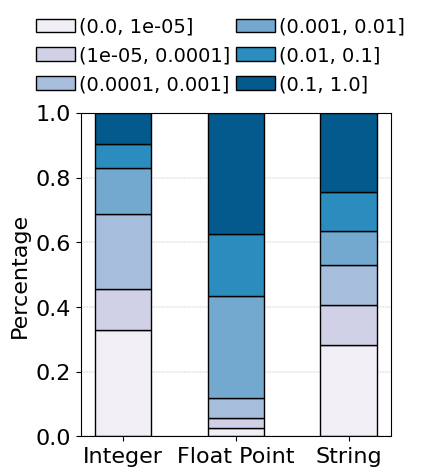

In [30]:
# None data_df indicating using all data directly. i.e normalized cwi and nocwi
def plot_card(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=single_fig_size)
    car_cut = [0,1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1]
    values_list = []
    labels = ['Integer', 'Float Point', 'String']
    for idx,dtype in enumerate(dtype_list):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]

            car_cwi_hist=pd.cut(tmp_df_cwi['cardinality'], car_cut).value_counts(normalize=True).sort_index() * cwi_ratio
            car_noc_hist=pd.cut(tmp_df_noc['cardinality'], car_cut).value_counts(normalize=True).sort_index() * noc_ratio
            car_hist=car_cwi_hist.add(car_noc_hist, fill_value=0)
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            car_hist = pd.cut(tmp_df['cardinality'], car_cut).value_counts(normalize=True).sort_index()
        values_list.append(car_hist.values)
    cut_ranges = car_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    tmp_colors = color_map(len(cut_ranges), 'Oranges')
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], 
               hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_title('Cardinality Ratio Distribution')
    # ax.set_xlabel('Data Type')
    ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    # ax.set_xticks(car_cut)
    l = car_hist.index.categories.left.map("{:1.0e}".format)
    r = car_hist.index.categories.right.map("{:1.0e}".format)
    # print('('+l+', '+r+']')
    # ax.set_xticks(range(len(car_hist)),'('+l+', '+r+']',size='small')
    # ax.xaxis.set_major_formatter('{x:g}')
    # plt.grid(axis='y', linestyle='--', linewidth=0.35)
    # ax.legend(cut_ranges,loc="upper left", bbox_to_anchor=((-0.2,1.25)), ncol=3, frameon=False,
    #                          prop={'size': 12}, columnspacing=0.3, handletextpad=0.2)
    tmp_args = lengend_args.copy()
    tmp_args['ncol'] = 2
    tmp_args['bbox_to_anchor'] = ((-0.2,1.35))
    ax.legend(cut_ranges, **tmp_args)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='--', linewidth=0.35)
    return fig, ax

fig, _ = plot_card()
fig.savefig('car_core.pdf', bbox_inches='tight')
# plot_card()
# plot_card(df[(df['dataset']=='ml')])

In [31]:
def plot_unique_num(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=single_fig_size)
    categ_cut = [0,10,100,1000,10000,100000,1310720]
    values_list = []
    labels = ['Integer', 'Float Point', 'String']
    for idx,dtype in enumerate(dtype_list):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]

            categ_cwi_hist=pd.cut(tmp_df_cwi['unique_num'], categ_cut).value_counts(normalize=True).sort_index() * cwi_ratio
            categ_noc_hist=pd.cut(tmp_df_noc['unique_num'], categ_cut).value_counts(normalize=True).sort_index() * noc_ratio
            categ_hist=categ_cwi_hist.add(categ_noc_hist, fill_value=0)
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            categ_hist = pd.cut(tmp_df['unique_num'], categ_cut).value_counts(normalize=True).sort_index()
        values_list.append(categ_hist.values)
    cut_ranges = categ_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_title('Unique Elements Distribution')
    # ax.set_xlabel('Data Type')
    # ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    ax.set_axisbelow(True)
    ax.grid(axis='y', linestyle='--', linewidth=0.35)
    tmp_args = lengend_args.copy()
    tmp_args['ncol'] = 2
    ax.legend(cut_ranges, **tmp_args)
    #fig.set_size_inches(11, 8)
    return fig, ax

def plot_null(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=single_fig_size)
    null_cut=[-1e-3, 0,1e-5,1e-3, 1e-1, 0.5, 1]
    values_list = []
    labels = ['Integer', 'Float Point', 'String']
    # plot null_ratio
    for idx,dtype in enumerate(dtype_list):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]

            null_cwi_hist=pd.cut(tmp_df_cwi['null_ratio'], null_cut).value_counts(normalize=True).sort_index() * cwi_ratio
            null_noc_hist=pd.cut(tmp_df_noc['null_ratio'], null_cut).value_counts(normalize=True).sort_index() * noc_ratio
            null_hist=null_cwi_hist.add(null_noc_hist, fill_value=0)
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            null_hist = pd.cut(tmp_df['unique_num'], null_cut).value_counts(normalize=True).sort_index()
        values_list.append(null_hist.values)
    cut_ranges = null_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_title('Null Ratio Distribution')
    # ax.set_xlabel('Data Type')
    # ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    ax.set_axisbelow(True)
    plt.grid(axis='y', linestyle='--', linewidth=0.35)
    cut_ranges = list(cut_ranges)
    cut_ranges[0] = '0'
    ax.legend(cut_ranges, **lengend_args)
    #fig.set_size_inches(11, 8)
    return fig, ax

def plot_width(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 3.3))
    width_cut_dict = {
        'int64': [0, 10, 100, 1000, 10000, 100000, 100000000],
        'object': [0, 5, 10, 25, 50, 100,1000]
    }
    values_list = []
    labels = ['Integer', 'String']
    # plot null_ratio
    for idx,dtype in enumerate(['int64', 'object']):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]

            null_cwi_hist=pd.cut(tmp_df_cwi['width_median'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index() * cwi_ratio
            null_noc_hist=pd.cut(tmp_df_noc['width_median'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index() * noc_ratio
            null_hist=null_cwi_hist.add(null_noc_hist, fill_value=0)
            if dtype == 'object':
                str_hist = null_hist.copy()
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            null_hist = pd.cut(tmp_df['unique_num'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index()
        values_list.append(null_hist.values)
    cut_ranges = null_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    ax.set_axisbelow(True)
    plt.grid(axis='y', linestyle='--', linewidth=0.35)
    str_ranges = str_hist.index.categories
    int_ranges=['(0,1]','(1e1,1e2]','(1e2,1e3]','(1e3,1e4]','(1e4,1e5]','(1e5,1e6]','(1e6,1e8]']
    tmp_args = lengend_args.copy()
    tmp_args['ncol'] = 1
    tmp_args['bbox_to_anchor'] = ((1,0.95))
    legend_list = [f"{int_ranges[0]}        /{str_ranges[0]}"] + \
        ["{}/{}".format(a_, b_) for a_, b_ in zip(int_ranges[1:], str_ranges[1:])]
    ax.legend(legend_list, **tmp_args)
    ax.text(2,0.96,'Int Value    / Str Length', fontsize=12)
    return fig, ax

# return two figs
def plot_width_old(data_df=None, ax=None):
    width_cut_dict = {
        'int64': [0, 10, 100, 1000, 10000, 100000, 1000000, 100000000],
        'object': [0, 5, 10, 25, 50, 100, 250,1000]
    }
    # plot width_distribution
    fig_list = []
    for idx,dtype in enumerate(['int64','object']):
        fig, ax = plt.subplots(figsize=single_fig_size)
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]
            width_cwi_hist=pd.cut(tmp_df_cwi['width_median'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index() * cwi_ratio
            width_noc_hist=pd.cut(tmp_df_noc['width_median'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index() * noc_ratio
            width_hist=width_cwi_hist.add(width_noc_hist, fill_value=0)
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            width_hist = pd.cut(tmp_df['unique_num'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index()
        x = np.arange(len(width_cut_dict[dtype])-1)
        ax.bar(x, width_hist.values, width=0.8, label=dtype, color=color_list[idx])
        if dtype=='int64':
            # ax.set_title('Width Distribution of Integer Columns')
            x_labels=['(0,10]','(10,100]','(100,1000]','(1e3,1e4]','(1e4,1e5]','(1e5,1e6]','(1e6,1e8]']
        else:
            # ax.set_title('Width Distribution of String Columns')
            x_labels=list(width_hist.index.astype(str))
        ax.set_xticks(range(len(width_hist)),x_labels,size='small')
        ax.set_xlabel('Per-column Median Width of The Values')
        ax.set_ylabel('Percentage')
        ax.legend()
        #fig.set_size_inches(11, 8)
        fig_list.append(fig)
    return fig_list

def cal_skew(df):
    single_df = df[df['unique_num'] == 1]
    bi_df = df[df['unique_num'] == 2]
    uni_df = df[(df['unique_num'] >= 3) & (df['zipf'] < 0.01)]
    real_hotspot_df = df[(df['unique_num'] >= 3) & (df['most_repeated_0'] > 9 * df['most_repeated_2'])]
    zipf_df = df[(df['unique_num'] >= 3) & (df['zipf_r2'] >= -10) & (df['zipf'] >= 0.01)]
    tot_col_num = len(df)
    pattern_prob = pd.DataFrame({
        'uniform': [len(uni_df) / tot_col_num],
        'gentle_zipf': [(tot_col_num - len(bi_df) - len(uni_df) - len(real_hotspot_df) - len(single_df)) / tot_col_num],
        'hotspot': [len(real_hotspot_df) / tot_col_num],
        'binary': [len(bi_df) / tot_col_num],
        'single': [len(single_df) / tot_col_num],
    })
    return pattern_prob

def plot_skew(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=single_fig_size)
    values_list = []
    labels = ['Integer', 'Float Point', 'String']
    for idx,dtype in enumerate(dtype_list):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]
            cwi_pattern_prob= cal_skew(tmp_df_cwi)
            noc_pattern_prob= cal_skew(tmp_df_noc)
            pattern_hist = (cwi_pattern_prob*cwi_ratio).add(noc_pattern_prob*noc_ratio, fill_value=0)
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            pattern_hist = cal_skew(tmp_df)
        values_list.append(pattern_hist.values)
    cut_ranges = list(pattern_hist.columns.values)
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_title('Skew Pattern Distribution')
    # ax.set_xlabel('Data Type')
    # ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    ax.set_axisbelow(True)
    plt.grid(axis='y', linestyle='--', linewidth=0.35)
    import copy
    tmp_args = copy.deepcopy(lengend_args)
    tmp_args['bbox_to_anchor'] = ((-0.05,1.33))
    ax.legend(cut_ranges, **tmp_args)
    #fig.set_size_inches(11, 8)
    return fig, ax

def plot_zipf(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=single_fig_size)
    values_list = []
    labels = ['Integer', 'Float Point', 'String']
    zipf_cut=[0.01,0.5,1.0,1.5,2.0, 3.0, 4.0]
    for idx,dtype in enumerate(dtype_list):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]
            zipf_cwi_hist=pd.cut(tmp_df_cwi['zipf'], zipf_cut).value_counts(normalize=True).sort_index() * cwi_ratio
            zipf_noc_hist=pd.cut(tmp_df_noc['zipf'], zipf_cut).value_counts(normalize=True).sort_index() * noc_ratio
            zipf_hist=zipf_cwi_hist.add(zipf_noc_hist, fill_value=0)
        else:
            tmp_df = data_df[(data_df['dtype']==dtype)]
            zipf_hist = pd.cut(tmp_df['zipf'], zipf_cut).value_counts(normalize=True).sort_index()
        values_list.append(zipf_hist.values)
    cut_ranges = zipf_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_title('Zipf Distribution')
    # ax.set_xlabel('Data Type')
    # ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    ax.set_axisbelow(True)
    plt.grid(axis='y', linestyle='--', linewidth=0.35)
    import copy
    tmp_args = copy.deepcopy(lengend_args)
    tmp_args['ncol'] = 2
    tmp_args['bbox_to_anchor'] = ((-0.05,1.33))
    ax.legend(cut_ranges, **tmp_args)
    #fig.set_size_inches(11, 8)
    return fig, ax
def plot_sort(data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=single_fig_size)
    values_list = []
    labels = ['Integer', 'Float Point', 'String']
    zipf_cut=[0,0.2,0.4,0.6,0.8,1]
    for idx,dtype in enumerate(dtype_list):
        if data_df is None:
            tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
            tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]
            zipf_cwi_hist=pd.cut(tmp_df_cwi['sortedness_mean'], zipf_cut).value_counts(normalize=True).sort_index() * cwi_ratio
            zipf_noc_hist=pd.cut(tmp_df_noc['sortedness_mean'], zipf_cut).value_counts(normalize=True).sort_index() * noc_ratio
            zipf_hist=zipf_cwi_hist.add(zipf_noc_hist, fill_value=0)
        else:
            tmp_df = data_df[(data_df['sortedness_mean']==dtype)]
            zipf_hist = pd.cut(tmp_df['sortedness_mean'], zipf_cut).value_counts(normalize=True).sort_index()
        values_list.append(zipf_hist.values)
    cut_ranges = zipf_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_title('Zipf Distribution')
    # ax.set_xlabel('Data Type')
    # ax.set_ylabel('Percentage')
    ax.set_ylim(0,1)
    ax.set_axisbelow(True)
    plt.grid(axis='y', linestyle='--', linewidth=0.35)
    import copy
    tmp_args = copy.deepcopy(lengend_args)
    tmp_args['ncol'] = 2
    tmp_args['bbox_to_anchor'] = ((-0.0,1.33))
    ax.legend(cut_ranges, **tmp_args)
    #fig.set_size_inches(11, 8)
    return fig, ax

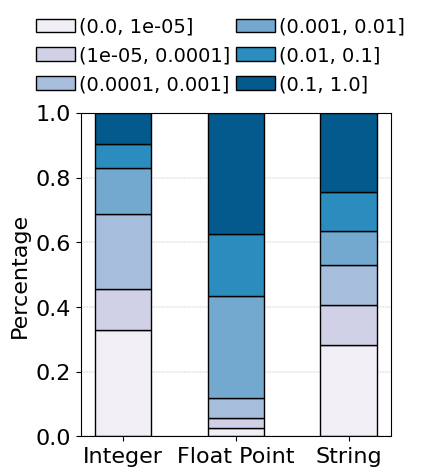

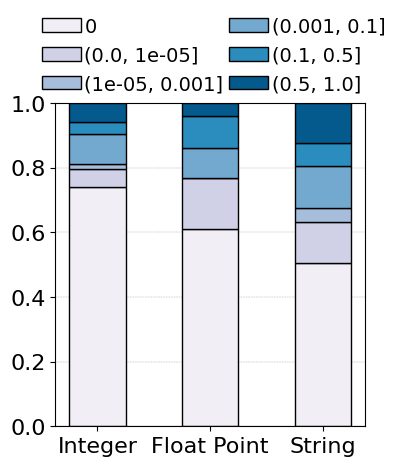

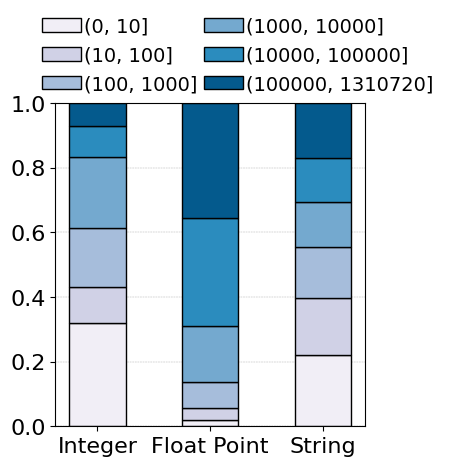

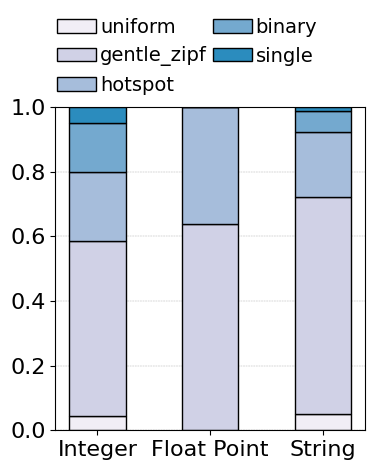

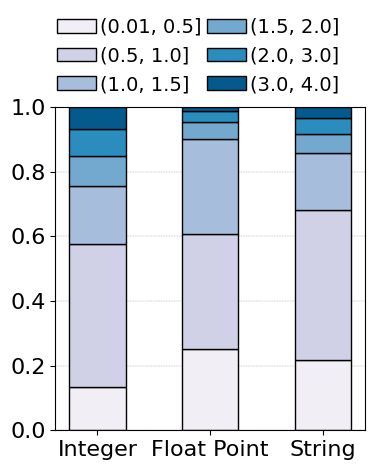

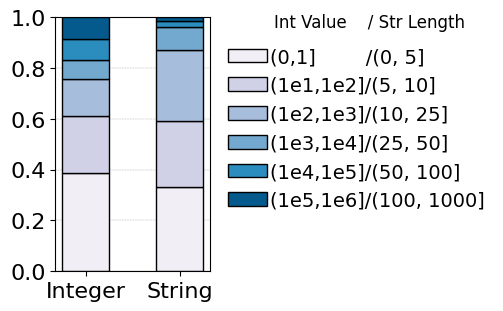

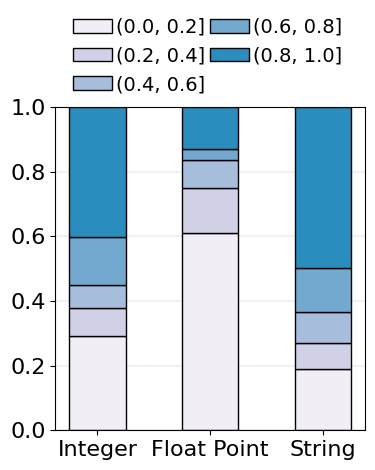

In [22]:
plot_functions = [plot_card, plot_null, plot_unique_num, plot_skew, plot_zipf, plot_width, plot_sort]
plot_names = ['card', 'null', 'unique_num', 'skew', 'zipf', 'width', 'sort']
for i, plot_func in enumerate(plot_functions):
    fig, ax = plot_func()
    fig.savefig('./{}_core.pdf'.format(plot_names[i]), bbox_inches='tight')
# figs = plot_width()
# for i, fig in enumerate(figs):
#     fig.savefig('./width_{}_core.pdf'.format(i), bbox_inches='tight', dpi=300)

# separate plot for width int and string

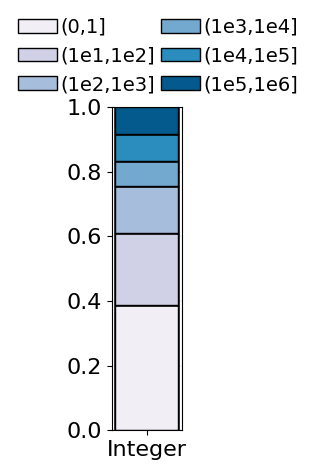

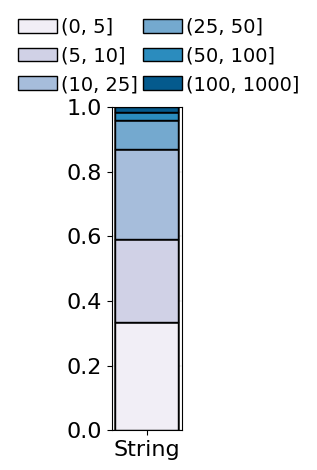

In [47]:
def plot_width_type(dtype, data_df=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(0.9,4.2))
    width_cut_dict = {
        'int64': [0, 10, 100, 1000, 10000, 100000, 100000000],
        'object': [0, 5, 10, 25, 50, 100,1000]
    }
    values_list = []
    # labels = ['Integer', 'String']
    labels = 'Integer' if dtype == 'int64' else 'String'
    # plot null_ratio
    # for idx,dtype in enumerate(['int64', 'object']):
    if data_df is None:
        tmp_df_cwi = df_cwi[(df_cwi['dtype']==dtype)]
        tmp_df_noc = df_noc[(df_noc['dtype']==dtype)]

        null_cwi_hist=pd.cut(tmp_df_cwi['width_median'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index() * cwi_ratio
        null_noc_hist=pd.cut(tmp_df_noc['width_median'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index() * noc_ratio
        null_hist=null_cwi_hist.add(null_noc_hist, fill_value=0)
        if dtype == 'object':
            str_hist = null_hist.copy()
    else:
        tmp_df = data_df[(data_df['dtype']==dtype)]
        null_hist = pd.cut(tmp_df['unique_num'], width_cut_dict[dtype]).value_counts(normalize=True).sort_index()
    values_list.append(null_hist.values)
    cut_ranges = null_hist.index.categories
    tmp_df = pd.DataFrame(list(map(np.ravel, values_list)))

    bottom = np.zeros(len(labels))
    # ax.set_xlim([-1, 1])
    for i, (columnName, columnData) in enumerate(tmp_df.iteritems()):
        ax.bar(labels, columnData.values, label=cut_ranges[i], bottom=bottom,width=WIDTH,color=color_patches[i], hatch=pattern[i], edgecolor='black')
        bottom += columnData.values

    # ax.set_ylabel('Percentage')
    ax.set_ybound(0,1)
    ax.set_axisbelow(True)
    plt.grid(axis='y', linestyle='--', linewidth=0.35)
    tmp_args = lengend_args.copy()
    tmp_args['ncol'] = 2
    tmp_args['bbox_to_anchor'] = ((-1.6,1.33))
    if dtype == 'int64':
        legend_list=['(0,1]','(1e1,1e2]','(1e2,1e3]','(1e3,1e4]','(1e4,1e5]','(1e5,1e6]','(1e6,1e8]']
    else:
        legend_list=str_hist.index.categories
    ax.legend(legend_list, **tmp_args)
    # ax.text(2,0.96,'Int Value    / Str Length', fontsize=12)
    return fig, ax
fig, _ = plot_width_type('int64')
fig.savefig('./width_int.pdf', bbox_inches='tight')
fig, _ = plot_width_type('object')
fig.savefig('./width_str.pdf', bbox_inches='tight')

# Begin type distribution plot

In [11]:
num_cwi_rows = df_cwi.shape[0]
num_cwi_int = df_cwi[df_cwi['dtype'] == 'int64'].shape[0]
num_cwi_float = df_cwi[df_cwi['dtype'] == 'float64'].shape[0]
num_cwi_string = df_cwi[df_cwi['dtype'] == 'object'].shape[0]
num_cwi_bool = df_cwi[df_cwi['dtype'] == 'bool'].shape[0]

num_nocwi_rows = df_noc.shape[0]
num_noc_int = df_noc[df_noc['dtype'] == 'int64'].shape[0]
num_noc_float = df_noc[df_noc['dtype'] == 'float64'].shape[0]
num_noc_string = df_noc[df_noc['dtype'] == 'object'].shape[0]
num_noc_bool = df_noc[df_noc['dtype'] == 'bool'].shape[0]

In [12]:
print(num_cwi_float)


494


In [13]:

# fig, ax = plot_sort()
# fig.savefig('./{}_core.pdf'.format('sort'), bbox_inches='tight')